# Лабораторная работа
## Ансамбли моделей машинного обучения.
Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Задание:
Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
одну из моделей группы бустинга;
одну из моделей группы стекинга.
(+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:

Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv('googleplaystore.csv')

In [84]:
# ОЧИЩАЕМ ДАТАСЕТ, КАК В ЛАБ. РАБОТАХ №1 И №"2
# Предположу, что данные версии андроида, обновления и версии нас мало интерисуют, удалим эти столбцы
# удаление столбца
data = data.drop('App', axis=1)
data = data.drop('Android Ver', axis=1)
data = data.drop('Current Ver', axis=1)
data = data.drop('Last Updated', axis=1)

# Как видно, столбец Reviews и прочие имеют тип object, хотя в них числовые значения
# Уберем букву "M", которая обозначает миллион или мегабайт, чтобы остались сухие числа

# удаление строк, содержащих "Varies with device"
data = data[data['Size'] != 'Varies with device']
data = data[data['Price'] != 'Everyone']

# сохранение изменений в исходном файле
#data.to_csv('dataset.csv', index=False)


if data['Size'].dtypes == 'object':
    data['Size'] = data['Size'].str.replace('M', '')
    data['Size'] = data['Size'].str.replace('k', '')
    data['Size'] = data['Size'].str.replace('+', '')
    data['Size'] = data['Size'].str.replace(',', '.')
    data['Size'] = data['Size'].astype(float)

if data['Reviews'].dtypes == 'object':
    data['Reviews'] = data['Reviews'].str.replace('M', '')
    data['Reviews'] = data['Reviews'].astype(int)

if data['Price'].dtypes == 'object':
    data['Price'] = data['Price'].str.replace('$', '')
    data['Price'] = data['Price'].astype(float)
    
if data['Installs'].dtypes == 'object':
    data['Installs'] = data['Installs'].str.replace('M', '')
    data['Installs'] = data['Installs'].str.replace('+', '')
    data['Installs'] = data['Installs'].str.replace(',', '')
    data['Installs'] = data['Installs'].astype(int) # значения в этой колонке слишком большие для float, да и не за чем он тут

if data['Type'].dtypes == 'object':
    data['Type'] = data['Type'].str.replace('Free', 'True') # => True будет значить, что приложение бесплатное 
    data['Type'] = data['Type'].str.replace('Paid', 'False') # => False будет значить, что приложение платное
    data['Type'] = data['Type'].astype(bool)

data = data.dropna()

data = data.drop_duplicates()

# очистили датасет, теперь он готов для построения графиков

In [85]:

data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,True,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,500000,True,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,True,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,True,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,True,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,44,619.0,1000,True,0.0,Everyone,Books & Reference
10834,FAMILY,4.0,7,2.6,500,True,0.0,Everyone,Education
10836,FAMILY,4.5,38,53.0,5000,True,0.0,Everyone,Education
10837,FAMILY,5.0,4,3.6,100,True,0.0,Everyone,Education


In [86]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Category
Content Rating
Genres


In [87]:
le2 = LabelEncoder()
data['Content Rating'] = le2.fit_transform(data['Content Rating']);

In [88]:
le1 = LabelEncoder()
data['Category'] = le1.fit_transform(data['Category']);

In [89]:
le3 = LabelEncoder()
data['Genres'] = le3.fit_transform(data['Genres']);

In [90]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую


In [91]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'Reviews']
data_y = data['Reviews']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [92]:
train_x.shape   

(5194, 8)

In [93]:
test_x.shape

(2226, 8)

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

## Обучение моделей

### Случайный лес

In [95]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [96]:
test_model(ran_80)

mean_absolute_error: 80153.95
median_absolute_error: 1210.59
r2_score: 0.95


In [97]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [99]:
reg = gs.best_estimator_

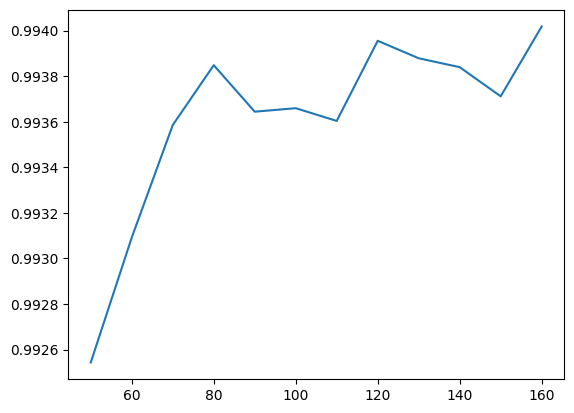

In [100]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

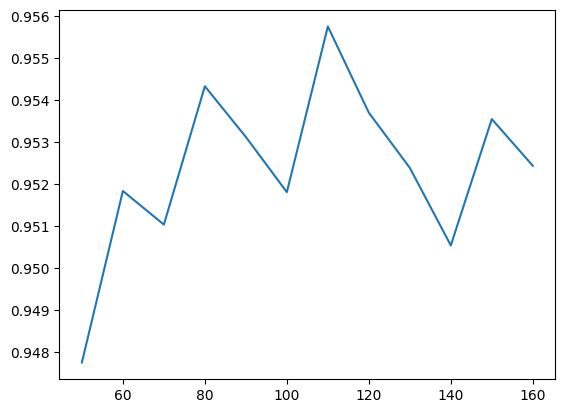

In [101]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [102]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 82237.94
median_absolute_error: 1163.82
r2_score: 0.94


### Градиентный бустинг

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [104]:
test_model(gr_80)

mean_absolute_error: 130749.55
median_absolute_error: 11546.98
r2_score: 0.89


In [105]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [106]:
reg = gs.best_estimator_

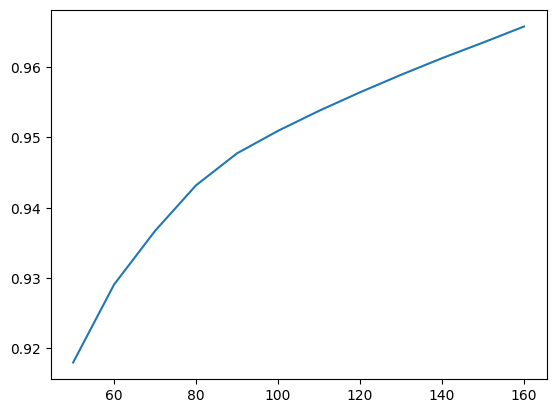

In [107]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

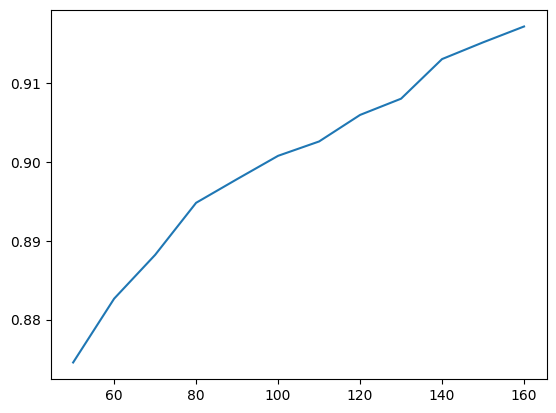

In [108]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [109]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 121006.41
median_absolute_error: 11974.13
r2_score: 0.92
